In [119]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier


In [120]:
df = pd.read_csv("titanic-passengers.csv", sep= ";")

In [121]:
df['Age'].fillna(df["Age"].mean(), inplace = True )
df['Cabin'].fillna(df["Cabin"].value_counts().index[0], inplace = True)
df['Embarked'].fillna(df["Embarked"].value_counts().index[0], inplace = True)
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [122]:
survived = {"Survived" : { "Yes" : 1, "No" : 0}}
df.replace(survived, inplace= True)


In [123]:
sex = {"Sex": {"male" : 0, "female" : 1}}
df.replace(sex, inplace= True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.000000,0,0,248740,13.0000,B96 B98,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.000000,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.000000,0,0,350050,7.8542,B96 B98,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.000000,0,4,349909,21.0750,B96 B98,S
4,672,0,1,"Davidson, Mr. Thornton",0,31.000000,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,B96 B98,C
887,61,0,3,"Sirayanian, Mr. Orsen",0,22.000000,0,0,2669,7.2292,B96 B98,C
888,535,0,3,"Cacic, Miss. Marija",1,30.000000,0,0,315084,8.6625,B96 B98,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",0,29.699118,0,0,349215,7.8958,B96 B98,S


In [124]:
encoder = LabelEncoder()
df["Embarked"] = encoder.fit_transform(df["Embarked"])

In [125]:
x = df[['Sex',"Pclass"]]
y = df['Survived']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)

In [126]:
model = tree.DecisionTreeClassifier()  
clf = model.fit(x_train, y_train)  
y_pred=clf.predict(x_test)   
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8022388059701493


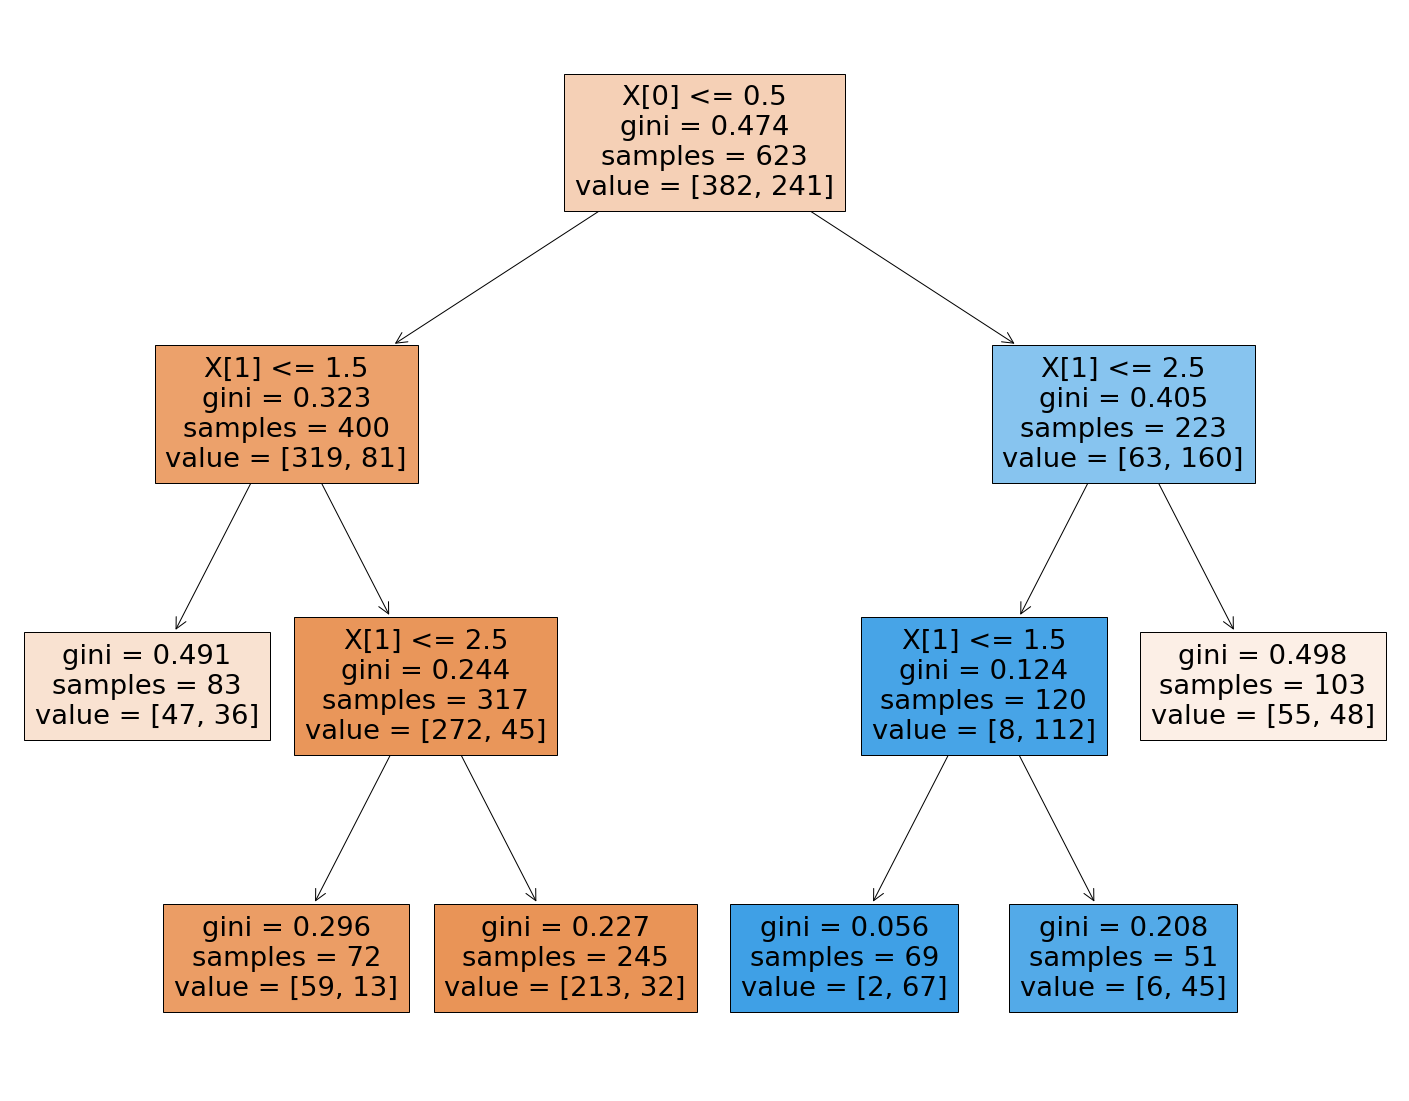

In [127]:
fig = plt.figure(figsize=(25,20))
eh = tree.plot_tree(clf,filled=True)


in this decision tree , the root node splis the data into 2 samples, people with x[0] < 0.5 which means males because x[0] is the feature of the Sex and 0 reffers to males, and people with x[0] > 0.5 which mean females because 1 reffers the females, and then it splits it again to people who have 2 and 3 for the Pclasses and people who have 1 

In [128]:
model1= tree.DecisionTreeClassifier(criterion="gini",splitter= "random", max_leaf_nodes=2)
clf1 = model1.fit(x_train, y_train)  
y_pred1=clf1.predict(x_test) 
print("score:{}".format(accuracy_score(y_test, y_pred1)))

score:0.8283582089552238


when i changed the parameters the value change a little bit and got more accurate 

In [129]:
model2 = RandomForestClassifier(n_estimators=12) 
rf = model2.fit(x_train, y_train)  
y_pred2=rf.predict(x_test)  
print("score:{}".format(accuracy_score(y_test, y_pred2)))

score:0.8022388059701493


In [131]:
model3 = RandomForestClassifier(n_estimators=1) 
rf2 = model3.fit(x_train, y_train)  
y_pred3=rf2.predict(x_test)  
print("score:{}".format(accuracy_score(y_test, y_pred3)))

score:0.7238805970149254


the random forest with the more n_estimators gives a higher score